In [19]:
!pip install google-play-scraper textblob wordcloud matplotlib seaborn

In [20]:
from google_play_scraper import reviews, Sort
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import os

In [21]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
print("Lokasi penyimpanan:", os.getcwd())

Lokasi penyimpanan: /content


In [23]:
# Scraping review WhatsApp
result, _ = reviews(
    'com.whatsapp',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=11000  # Ambil 11000 review
)

In [24]:
# Konversi ke DataFrame
data = pd.DataFrame(result)
print(data.head())  # Cek data yang berhasil diambil


                               reviewId         userName  \
0  9665c531-4fcb-42aa-94c1-0c284c3a2e8c  Pengguna Google   
1  0c416c81-a780-4edb-a690-3a4a580316c3  Pengguna Google   
2  5d2efd25-bfc6-4e26-b610-8702d8588cd8  Pengguna Google   
3  472a6ca0-dc26-411c-857e-0ed2f85bf870  Pengguna Google   
4  de462026-d884-4071-99b8-31c7b50d5615  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  semenjak update hasil kamera depan WhatsApp sa...      4            935   
1  Di Fitur Daftar Baru, kontak yang ditambahkan ...      1           7305   
2  Halo tim WhatsApp tolong munculkan fitur Musik...      1         

In [25]:
# Pilih kolom yang penting
data = data[['userName', 'score', 'content']]
data.dropna(inplace=True)  # Hapus nilai kosong
data['content'] = data['content'].astype(str)

<ipython-input-25-18254005a937>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)  # Hapus nilai kosong
<ipython-input-25-18254005a937>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content'] = data['content'].astype(str)


In [26]:
# Daftar kata kunci positif & negatif
positive_keywords = [
    'bagus', 'puas', 'mantap', 'suka', 'baik', 'lancar', 'top', 'senang', 'membantu',
    'nyaman', 'cepat', 'memuaskan', 'keren', 'praktis', 'mudah', 'aman', 'stabil',
    'responsif', 'efisien', 'kualitas tinggi', 'inovatif', 'fungsional', 'terpercaya',
    'update bermanfaat', 'komunikasi lancar', 'panggilan jernih', 'notifikasi tepat',
    'privasi terjaga', 'tampilan elegan', 'performa optimal', 'suara jernih',
    'video call lancar', 'chat cepat', 'grup efektif', 'pencadangan aman',
    'privasi terjamin', 'tampilan modern', 'pengiriman cepat', 'panggilan stabil',
    'notifikasi real-time', 'kualitas video bagus', 'suara jelas', 'tampilan simpel',
    'komunikasi efektif', 'keamanan terjamin', 'tampilan modern', 'performa optimal',
    'panggilan stabil', 'notifikasi tepat', 'tampilan elegan', 'performa optimal',
    'menyenangkan', 'terbaik', 'sempurna', 'handal', 'canggih', 'menarik', 'memudahkan',
    'terpercaya', 'stabil', 'responsif', 'efisien', 'kualitas tinggi', 'inovatif',
    'fungsional', 'terpercaya', 'update bermanfaat', 'komunikasi lancar', 'panggilan jernih',
    'notifikasi tepat', 'privasi terjaga', 'tampilan elegan', 'performa optimal',
    'suara jernih', 'video call lancar', 'chat cepat', 'grup efektif', 'pencadangan aman',
    'privasi terjamin', 'tampilan modern', 'pengiriman cepat', 'panggilan stabil',
    'notifikasi real-time', 'kualitas video bagus', 'suara jelas', 'tampilan simpel',
    'komunikasi efektif', 'keamanan terjamin', 'tampilan modern', 'performa optimal',
    'panggilan stabil', 'notifikasi tepat', 'tampilan elegan', 'performa optimal'
]

negative_keywords = [
    'buruk', 'jelek', 'lambat', 'error', 'tidak suka', 'parah', 'benci', 'lemot',
    'bug', 'gagal', 'rusak', 'tidak nyaman', 'susah', 'tidak aman', 'tidak stabil',
    'tidak responsif', 'tidak efisien', 'kualitas rendah', 'tidak inovatif',
    'tidak fungsional', 'tidak terpercaya', 'update merugikan', 'komunikasi terganggu',
    'panggilan putus', 'notifikasi telat', 'privasi bocor', 'tampilan jelek',
    'performa buruk', 'suara pecah', 'video call buram', 'chat lambat', 'grup kacau',
    'pencadangan gagal', 'privasi terganggu', 'tampilan kuno', 'pengiriman lambat',
    'panggilan gagal', 'notifikasi hilang', 'kualitas video buruk', 'suara tidak jelas',
    'tampilan ribet', 'komunikasi terganggu', 'keamanan bocor', 'tampilan kuno',
    'performa buruk', 'panggilan gagal', 'notifikasi hilang', 'tampilan jelek',
    'performa buruk', 'mengecewakan', 'tidak handal', 'tidak canggih', 'tidak menarik',
    'tidak memudahkan', 'tidak terpercaya', 'tidak stabil', 'tidak responsif',
    'tidak efisien', 'kualitas rendah', 'tidak inovatif', 'tidak fungsional',
    'tidak terpercaya', 'update merugikan', 'komunikasi terganggu', 'panggilan putus',
    'notifikasi telat', 'privasi bocor', 'tampilan jelek', 'performa buruk',
    'suara pecah', 'video call buram', 'chat lambat', 'grup kacau', 'pencadangan gagal',
    'privasi terganggu', 'tampilan kuno', 'pengiriman lambat', 'panggilan gagal',
    'notifikasi hilang', 'kualitas video buruk', 'suara tidak jelas', 'tampilan ribet',
    'komunikasi terganggu', 'keamanan bocor', 'tampilan kuno', 'performa buruk',
    'panggilan gagal', 'notifikasi hilang', 'tampilan jelek', 'performa buruk'
]


In [27]:
# Fungsi analisis sentimen dengan TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity

    if sentiment_score > 0:
        return "positif"
    elif sentiment_score < 0:
        return "negatif"
    else:
        return "netral"

In [28]:
# Fungsi analisis sentimen berbasis kata kunci
def keyword_based_sentiment(text):
    text = text.lower()
    if any(word in text for word in positive_keywords):
        return "positif"
    elif any(word in text for word in negative_keywords):
        return "negatif"
    else:
        return "netral"

In [29]:
# Kombinasi kedua metode
def combined_sentiment(text):
    textblob_sentiment = analyze_sentiment(text)
    keyword_sentiment = keyword_based_sentiment(text)
    # Jika kata kunci memberikan hasil selain netral, gunakan itu
    return keyword_sentiment if keyword_sentiment != "netral" else textblob_sentiment

In [30]:
# Fungsi menentukan sentimen berdasarkan rating dan review
def final_sentiment(row):
    rating = row['score']
    review_sentiment = combined_sentiment(row['content'])

    if rating >= 4:  # Rating tinggi (4-5)
        return "positif" if review_sentiment == "positif" else "netral"

    elif rating == 3:  # Rating netral (3)
        return "positif" if review_sentiment == "positif" else "netral"

    else:  # Rating rendah (1-2)
        return "negatif"

  # Terapkan analisis sentimen
data['sentiment'] = data.apply(final_sentiment, axis=1)


<ipython-input-31-ec0433fe4be0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['sentiment'], palette='coolwarm')


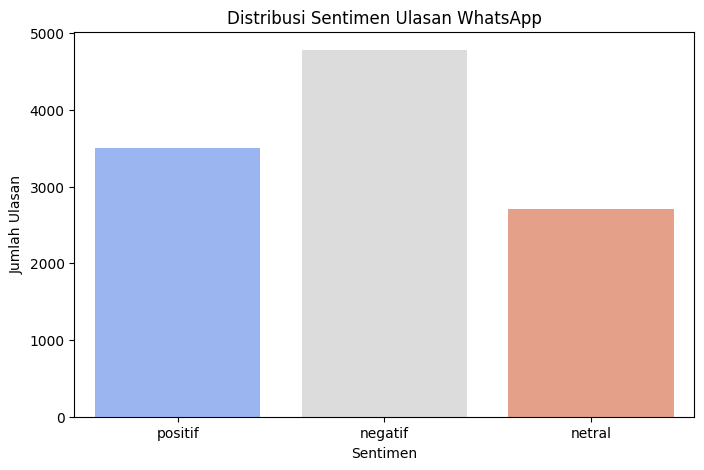

In [31]:
# Distribusi Sentimen
plt.figure(figsize=(8, 5))
sns.countplot(x=data['sentiment'], palette='coolwarm')
plt.title("Distribusi Sentimen Ulasan WhatsApp")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Ulasan")
plt.show()

In [32]:
# Word Cloud untuk Ulasan Positif & Negatif
positif_text = " ".join(data[data['sentiment'] == "positif"]['content'])
negatif_text = " ".join(data[data['sentiment'] == "negatif"]['content'])

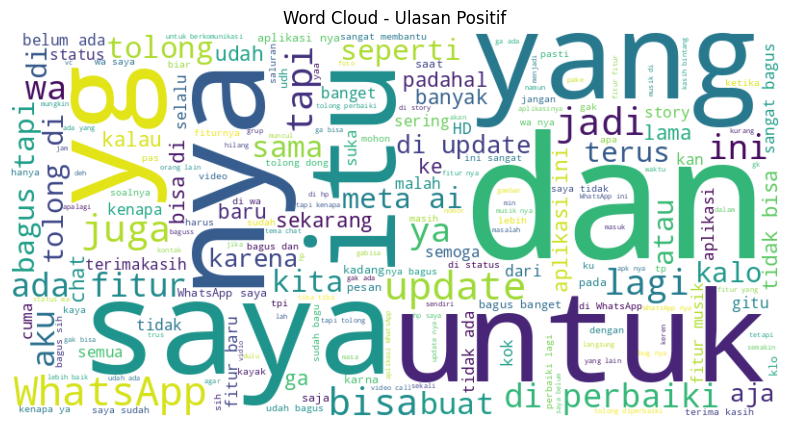

In [33]:
# WordCloud Positif
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(positif_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Ulasan Positif")
plt.show()


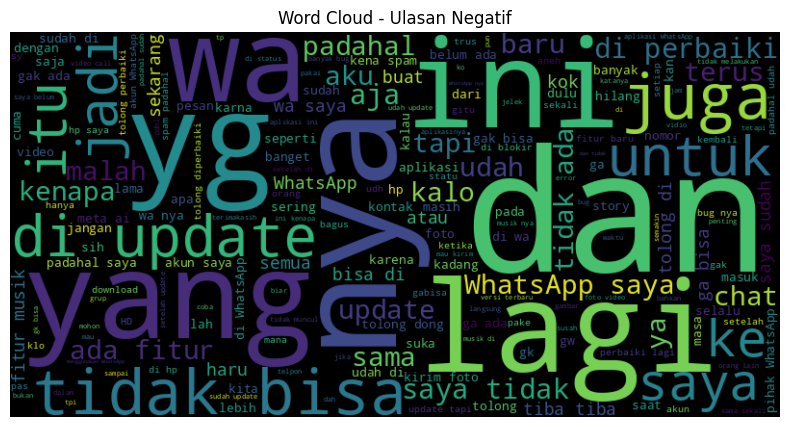

In [34]:
# WordCloud Negatif
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(background_color="black", width=800, height=400).generate(negatif_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Ulasan Negatif")
plt.show()

In [35]:
# Simpan hasil ke CSV
data.to_csv("WA.csv", index=False)
print("File berhasil disimpan sebagai 'WA.csv'")

File berhasil disimpan sebagai 'WA.csv'


In [36]:
# Tentukan lokasi penyimpanan di Google Drive
folder_path = '/content/drive/My Drive/Belajar_pengambangan_ML'
file_name = 'WA.csv'
full_path = os.path.join(folder_path, file_name)

# Buat folder jika belum ada
os.makedirs(folder_path, exist_ok=True)

# Simpan hasil scraping ke Google Drive
data.to_csv(full_path, index=False)
print(f"File berhasil disimpan di folder: {full_path}")



File berhasil disimpan di folder: /content/drive/My Drive/Belajar_pengambangan_ML/WA.csv
